## Problem 1

This problem explores the use of variational approximation in Latent Dirichlet Allocation (LDA). We will use the implementation in sklearn of the variational approximation algorithm in (Hoffman, et al., 2013).

Use the notation in  the diagram in Figure 1 (below) from (Blei, et al., 2003) to write the target posterior distribution of the latent variables and parameters for the general LDA method. Why do we use variational approximation rather than conjugate priors or sampling to obtain this posterior distribution?



![Figure 1. Latent Dirichlet Allocation](Figures/LDA_graph_copy.png)

Answer: The posterior of the multinomial probabilites for the topics, $\theta$, and the latent variables, $\bf{z}$:
$p(\theta, \bf{z}|\bf{w}, \alpha, \beta)$. Computing this posterior is intractable even with the conjugate priors because they are put togther in a generative model. Sampling does not perform well because we typically have a large number of words in our corpus and a large number of documents. Sampling does not scale to realistically sized problems.

Accident reports provide a good use-case for LDA since the narrative information in these reports is frequently overlooked in safety analysis. LDA allows us to capture elements (topics) in this narrative data and use them to better understand unsafe conditions. For this use-case, modify the LDA class for Wikipedia in the  $\texttt{LDA Examples - Wikipedia and Trains}$ jupyter notebook to perform LDA on the accident narratives. About 10 years of these narratives are in the json file, \texttt{TrainNarratives.txt}.  Use this class to obtain 10 topics from the accident narratives. 

## Train Accident Narratives

In [13]:
# Train accident narratives are in a json file
# Read the JSON file with the narratives and convert to a list for the LDA analysis

path = '/Users/donaldbrown/Dropbox/department/Classes/Data/TrainAccidents/'
file = 'TrainNarratives.txt'

with open(path + file) as json_file:  
    Narrative_dict = json.load(json_file)
    
train_reports = list(Narrative_dict.values())
    


In [14]:

class LDA_trains:
    """Creates a class for Latent Dirichlet Allocation using summaries from Wikipedia
    Input:
        reports = list of narratives from accident reports
        N_topics = number of topics for LDA to produce
        N_words = the number of words to show in a topic
        new_report = narrative for a new accident report not in the training set
    Methods:
        Topics = Print the list of topics in the selected narratives
        Predict_Topics = Show the predicted probabilities for topics for a new accident narrative"""
    
    def __init__(self, reports, N_topics=3, N_words = 10):
        # the narrative reports
        self.reports = reports
        # initialize variables
        self.N_topics = N_topics
        self.N_words = N_words
        
        # Get the word counts in the reports
        self.countVectorizer = CountVectorizer(stop_words='english')
        self.termFrequency = self.countVectorizer.fit_transform(self.reports)
        self.Words = self.countVectorizer.get_feature_names()
        
    def Topics(self):
        # Obtain the estimates for the LDA model
        self.lda = LatentDirichletAllocation(n_components=self.N_topics)
        self.lda.fit(self.termFrequency)
        
        # For each of the topics in the model add the top N_words the list of topics
        topics = list()
        for topic in self.lda.components_:
            topics.append([self.Words[i]
                        for i in topic.argsort()[:-self.N_words - 1:-1]])
        
        # Create column names for the output matrix
        cols = list()
        for i in range(self.N_words):
            cols.append("Word "+(str(i)))
            
        # Create a dataframe with the topic no. and the words in each topic 
        # output this dataframe 
        Topics_df = pd.DataFrame(topics, columns = cols)
        Topics_df.index.name = "Topics"
        return Topics_df
    
    def Predict_Topics(self, new_reports):
        self.new_reports = new_reports
        
        # Get the list of new accident report narratives
        # and the number of new narratives
        N_new_reports = len(self.new_reports)
        
        # For each of the new narratives 
        # obtain the estimated probabilities for each of the topics
        # in each of the new narratives as estimated by the LDA results
        # on the training set 
        new_report_topics = list()
        for report in self.new_reports:
            new_report_topics.append(self.lda.transform(self.countVectorizer.transform([report])))
            
        # Recast the list of probabilities for topics as an array 
        # of size no. of new reports X no. of topics
        new_report_topics = np.array(new_report_topics).reshape(N_new_reports, self.N_topics)
        
        # Create column names for the output dataframe
        cols = list()
        for i in range(self.N_topics):
            cols.append("Topic "+(str(i)))
        
        # Create the dataframe whose rows contain topic probabilities for 
        # specificed narratives/reports
        New_Reports_df = pd.DataFrame(new_report_topics, columns = cols )
        New_Reports_df.insert(0, 'Report No.', range(N_new_reports))
        return New_Reports_df
                

In [15]:
lda_train = LDA_trains(reports = train_reports, N_topics = 10, N_words = 10)
lda_train.Topics()

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9
Topics,,,,,,,,,,
0,car,track,damage,humping,pantograph,train,causing,humped,retarder,cars
1,derailed,car,cars,train,track,wide,rail,derailment,mp,gauge
2,switch,cars,derailed,track,point,rail,bnsf,causing,derail,lead
3,derailed,cars,loads,ns,empties,pulling,head,track,tons,east
4,cars,track,car,crew,train,conductor,switch,engineer,cut,end
5,cars,train,derailed,rail,track,emergency,car,went,broken,pulling
6,main,ble,lead,csxt,wheels,cp,locomotive,signal,cover,b18
7,car,switch,truck,train,derailed,causing,track,point,derail,operator
8,track,cars,switch,yard,derailed,crew,lead,car,shoving,hazardous


Use the class you developed for Problem above to obtain the probabilities for each of the topics in the first 10 narratives in the \texttt{TrainNarratives.txt} data set. What is the notation in Figure 1  that represents these probabilities?

In [16]:
lda_train.Predict_Topics(train_reports[:3])

,Report No.,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
0,0,0.004546,0.004547,0.311951,0.004547,0.004546,0.525414,0.004545,0.130811,0.004546,0.004546
1,1,0.009092,0.009093,0.009092,0.009092,0.009095,0.009092,0.313758,0.613500,0.009093,0.009093
2,2,0.002326,0.002326,0.002326,0.002326,0.002326,0.582049,0.002326,0.002327,0.399342,0.002326


These probabilities are represented by $\theta$ in the above Figure 1.

Briefly explain how a safety engineer at Federal Railroad Administration could use the results you obtain in the previous Problem to improve safety for trains. 

Answer: Safety engineers can use the topics to find common causes of accidents to better understand how to prioritize changes and allocate resources for improvements. For example, report 0 is well represented by topics 5 and 2. Topic 2 involves switch problems and topic 5 concerns cars that derail. This shows the need to repair or fix switch problems to reduce the derailment accidents.

In [17]:
train_reports[:3]

['UNITS 231-281(BACK TO BACK)  WERE COMING INTO UP DEISEL SHOP  WHEN THE LEFT WHEEL OF 281 RODE OVER RECENTLY REPAIRED SWITCH PLATE AND DERAILED. THE CAUSE WAS DETERMINED TO BE THE TRACK TELEMETRY IN THAT IT WAS TOO SHARP OF A CURVE.',
 'ENGINE 286 CAUGHT FIRE AT THE SPRINGFIELD, MA STATION DUE TO BEARINGS IN MAIN GENERATOR LET GO.',
 'TRAIN NO.#4 WITH ENGS 83/11/90/44 AND 11 CARS DERAILED 2 DEADHEAD CARS, C/44834 AND C/9639, WHILE MAKING A SHOVING MOVE ONTO TRACK 28.  THE DERAILMENT WAS DUE TO HIGH BUFF FORCES CAUSED JACKKNIFING OFDEADHEADING AMFLEET CAR 44834 LOCATED DIRECTLY BEHIND ENGINES DUE TO EXCESSIVE AMPERAGE GENERATED BY FOUR P42 LOCOMOTIVES SHOVING TRAIN AGAINST AN APPROXIMATELY 15-POUND BRAKE REDUCTION.']

## Problem 2

Neural networks are a graphical model, Markov Networks, that can be analyzed with Bayesian methods and Boltzmann machines are examples. Provide an explanation for the intractability of the calculation of the partition function, $Z$, in a Boltzmann machine. Explain how restricted Boltzmann machines help with this problem. Also explain how MCMC and variational methods can provide approximations to $Z$ in restricted Boltzman machines.




Answer: Calculating the partition function requires finding all the maximal cliques in the graph representing the Boltzmann machine and this has been shown to be an intractable problem. The restricted Boltzmann machine solves this by eliminating all connections between visible units and all connections between hidden units. Hence, the are a easily countable number of simple two node maximal cliques. As the number of connections and nodes increases (and possibly the depth of nodes in a deep Boltzmann machine) then variational methods can provide the approximation for the joint distribution represented by the product of the maximal cliques. For smaller Boltzmann machines we can use sampling for the approximation of this distribution.

## Problem 3

The following questions are based on reading and running the jupyter notebook, $\texttt{pymc3-variation-inference-neural-network.ipynb}$, by Thomas Wiecki, updated by Maxim Kochurov as provided in their blog, https://twiecki.io/blog/2016/06/01/bayesian-deep-learning/. Run the notebook and then answer these questions.


Wieki says that an advantage to using Bayesian modeling with neural network and deep learning is that "we could train the model specifically on samples it is most uncertain about." Explain how he finds these samples in this example. Explain how you would implement his suggestion (you do not have to actually implement this).


Answer: By obtaining the probability of classification, not just the classification itself, the Bayesian approach can find the region of highest uncertainty which he plots and visualizes. There are several approaches you can take to use the samples in this region to improve performance. First, you could train a new model just on these samples and use it as part of an ensemble with the original model. Second, you can the new model to work sequentially. This means first determine if the sample point is in the region high uncertainty. If not, use a model (possibly the original or new model) trained for points that well separated. If it is in the region of high certainty, use a model specialized for this region. Finally, if you problem involves classfication that has high misclassification costs (e.g., health care, security, etc.) you tag samples with high uncertainy as not yet classified and require further testing or more data to more accurately classify these points.

Wieki also says that another advantage to Bayesian modeling with neural network and deep learning is that "We also get uncertainty estimates of our weights which could inform us about the stability of the learned representations of the network." Discuss what the uncertainty estimates for the weights found for the example in this notebook imply.

Answer: Neural networks remain very much an empirically derived methodology. For instance, we don't know if Wieki's use of 2 hidden layers with 5 nodes in each layer is a good, never mind, the best architecture for this problem. By using Bayesian methods to model the uncertainty around the weights, we gain insights into this question of the appropriateness and effectiveness of the architecure. This means that much like in regression, if the credible interval for a weight distribution includes 0, then this weight and its associated connection do not contribute much to the solution generated by the neural network. Experimenting with multiple architecures and finding the posterior distribuitions for the weights gives us insights into the which architectures are better for the problem we are working on.

 Explain how the Gaussian priors help to regularize the weights in the neural network.

Answer: As we saw in the Bayesian formulation of regression where we considered the regression coefficients  to be random variables with prior and posterior distributions and this then produced models that are more generalizable or regularized. The same is true for neural networks where we put the priors on the weights in the network and obtain posteriors that then evaluate. The evaluation may suggest that some of the resulting weights in the neural network are no longer   influential because their posteriors suggest that they are statistically not different from zero. As with regression, this reduction of certain weights in the network will regularize its performance (i.e., enable it to better generalize). Given enough data, it does not matter if the prior is Gaussian (see the answer to the last question in this problem below) or some other reasonable (i.e., support over the real line) distribution.

Why do we use a variational approximation instead of sampling for estimating the posterior of the weights?

Neural networks, particularly deep neural networks, are large with many weights. They also require lots of data. Hence, we need methods that scale and variational methods scale but MCMC does not.

Change the prior distributions for all three sets of the neural net weights to Cauchy with location (alpha) = 0 and scale (beta) = 2. Rerun the remaining cells in the notebook and comment on any changes you see from this.

### First obtain results with the Gaussian priors as shown below.

### Generating data

First, lets generate some toy data -- a simple binary classification problem that's not linearly separable.

In [4]:
%matplotlib inline
import theano
import pymc3 as pm
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
sns.set_style('white')
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

/Users/donaldbrown/opt/anaconda3/envs/Bayes/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/donaldbrown/opt/anaconda3/envs/Bayes/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [5]:
X, Y = make_moons(noise=0.2, random_state=0, n_samples=1000)
X = scale(X)
X = X.astype(float)
Y = Y.astype(float)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5)

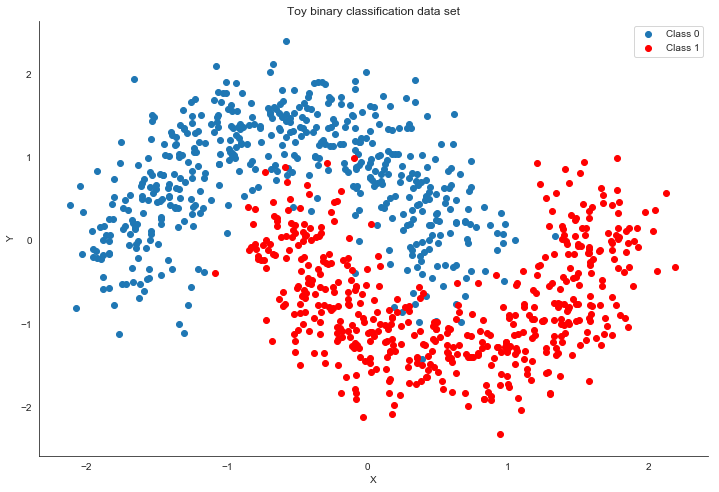

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X[Y==0, 0], X[Y==0, 1], label='Class 0')
ax.scatter(X[Y==1, 0], X[Y==1, 1], color='r', label='Class 1')
sns.despine(); ax.legend()
ax.set(xlabel='X', ylabel='Y', title='Toy binary classification data set');

In [4]:
# just to see the dimensions o four data
print(X_train.shape)
print(Y_train.shape)

(500, 2)
(500,)


### Model specification

A neural network is quite simple. The basic unit is a [perceptron](https://en.wikipedia.org/wiki/Perceptron) which is nothing more than [logistic regression](http://pymc-devs.github.io/pymc3/notebooks/posterior_predictive.html#Prediction). We use many of these in parallel and then stack them up to get hidden layers. Here we will use 2 hidden layers with 5 neurons each which is sufficient for such a simple problem.

In [5]:
def construct_nn(ann_input, ann_output):
    n_hidden = 5 # Number of neurons in each hidden layer
    
    # Initialize random weights between each layer
    init_1 = np.random.randn(X.shape[1], n_hidden).astype(float)
    init_2 = np.random.randn(n_hidden, n_hidden).astype(float)
    init_out = np.random.randn(n_hidden).astype(float)
        
    with pm.Model() as neural_network:
        # Weights from input to hidden layer
        weights_in_1 = pm.Normal('w_in_1', 0, sd=1, 
                                 shape=(X.shape[1], n_hidden), 
                                 testval=init_1)
        
        # Weights from 1st to 2nd layer
        weights_1_2 = pm.Normal('w_1_2', 0, sd=1, 
                                shape=(n_hidden, n_hidden), 
                                testval=init_2)
        
        # Weights from hidden layer to output
        weights_2_out = pm.Normal('w_2_out', 0, sd=1, 
                                  shape=(n_hidden,), 
                                  testval=init_out)
        
        # Build neural-network using tanh activation function
        act_1 = pm.math.tanh(pm.math.dot(ann_input, 
                                         weights_in_1))
        act_2 = pm.math.tanh(pm.math.dot(act_1, 
                                         weights_1_2))
        act_out = pm.math.sigmoid(pm.math.dot(act_2, 
                                              weights_2_out))
        
        # Binary classification -> Bernoulli likelihood
        out = pm.Bernoulli('out', 
                           act_out,
                           observed=ann_output,
                           total_size=Y_train.shape[0] # IMPORTANT for minibatches
                          )
    return neural_network

# Trick: Turn inputs and outputs into shared variables. 
# It's still the same thing, but we can later change the values of the shared variable 
# (to switch in the test-data later) and pymc3 will just use the new data. 
# Kind-of like a pointer we can redirect.
# For more info, see: http://deeplearning.net/software/theano/library/compile/shared.html
ann_input = theano.shared(X_train)
ann_output = theano.shared(Y_train)
neural_network = construct_nn(ann_input, ann_output)

That's not so bad. The `Normal` priors help regularize the weights. Usually we would add a constant `b` to the inputs but I omitted it here to keep the code cleaner.

### Variational Inference: Scaling model complexity

We could now just run a MCMC sampler like NUTS which works pretty well in this case, but as I already mentioned, this will become very slow as we scale our model up to deeper architectures with more layers.

Instead, we will use [ADVI](https://arxiv.org/abs/1603.00788) variational inference algorithm which was recently added to `PyMC3`, and updated to use the operator variational inference (OPVI) framework. This is much faster and will scale better. Note, that this is a mean-field approximation so we ignore correlations in the posterior.

In [6]:
from pymc3.theanof import set_tt_rng, MRG_RandomStreams
set_tt_rng(MRG_RandomStreams(42))

In [7]:
#%%time

with neural_network:
    inference = pm.ADVI()
    approx = pm.fit(n=50000, method=inference)

Finished [100%]: Average Loss = 125.61


Performance wise that's pretty good considering that NUTS is having a really hard time. Further below we make this even faster. To make it really fly, we probably want to run the Neural Network on the GPU.

As samples are more convenient to work with, we can very quickly draw samples from the variational approximation using the `sample` method (this is just sampling from Normal distributions, so not at all the same like MCMC):

In [8]:
trace = approx.sample(draws=5000)

Plotting the objective function (ELBO) we can see that the optimization slowly improves the fit over time.

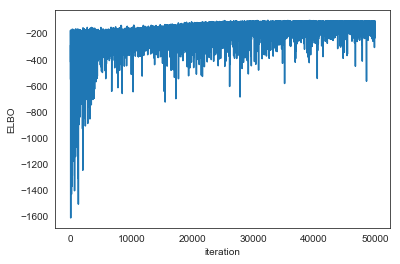

In [9]:
plt.plot(-inference.hist)
plt.ylabel('ELBO')
plt.xlabel('iteration');

Now that we trained our model, lets predict on the hold-out set using a posterior predictive check (PPC). 

In [10]:
# Replace arrays our NN references with the test data
ann_input.set_value(X_test)
ann_output.set_value(Y_test)

with neural_network:
    ppc = pm.sample_posterior_predictive(trace, samples=500, progressbar=False)

# Use probability of > 0.5 to assume prediction of class 1
pred = ppc['out'].mean(axis=0) > 0.5

Let's look at our predictions:

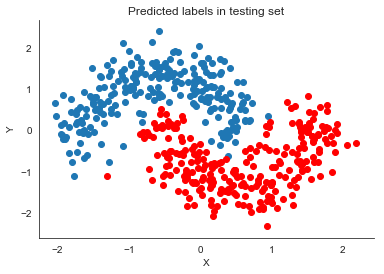

In [11]:
fig, ax = plt.subplots()
ax.scatter(X_test[pred==0, 0], X_test[pred==0, 1])
ax.scatter(X_test[pred==1, 0], X_test[pred==1, 1], color='r')
sns.despine()
ax.set(title='Predicted labels in testing set', xlabel='X', ylabel='Y');

In [12]:
print('Accuracy = {}%'.format((Y_test == pred).mean() * 100))

Accuracy = 95.6%


Hey, our neural network did all right!

## Lets look at what the classifier has learned

For this, we evaluate the class probability predictions on a grid over the whole input space.

In [13]:
grid = pm.floatX(np.mgrid[-3:3:100j,-3:3:100j])
grid_2d = grid.reshape(2, -1).T
dummy_out = np.ones(grid.shape[1], dtype=np.int8)

In [14]:
ann_input.set_value(grid_2d)
ann_output.set_value(dummy_out)

with neural_network:
    ppc = pm.sample_posterior_predictive(trace, samples=500, progressbar=False)

### Probability surface

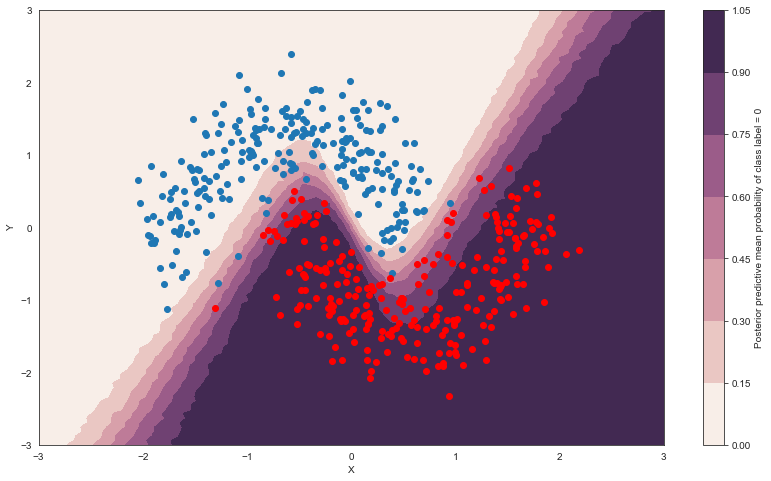

In [15]:
#cmap = sns.diverging_palette(250, 12, s=85, l=25, as_cmap=True)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, ax = plt.subplots(figsize=(14, 8))
contour = ax.contourf(grid[0], grid[1], ppc['out'].mean(axis=0).reshape(100, 100), cmap=cmap)
ax.scatter(X_test[pred==0, 0], X_test[pred==0, 1])
ax.scatter(X_test[pred==1, 0], X_test[pred==1, 1], color='r')
cbar = plt.colorbar(contour, ax=ax)
_ = ax.set(xlim=(-3, 3), ylim=(-3, 3), xlabel='X', ylabel='Y');
cbar.ax.set_ylabel('Posterior predictive mean probability of class label = 0');

### Uncertainty in predicted value

So far, everything I showed we could have done with a non-Bayesian Neural Network. The mean of the posterior predictive for each class-label should be identical to maximum likelihood predicted values. However, we can also look at the standard deviation of the posterior predictive to get a sense for the uncertainty in our predictions. Here is what that looks like:

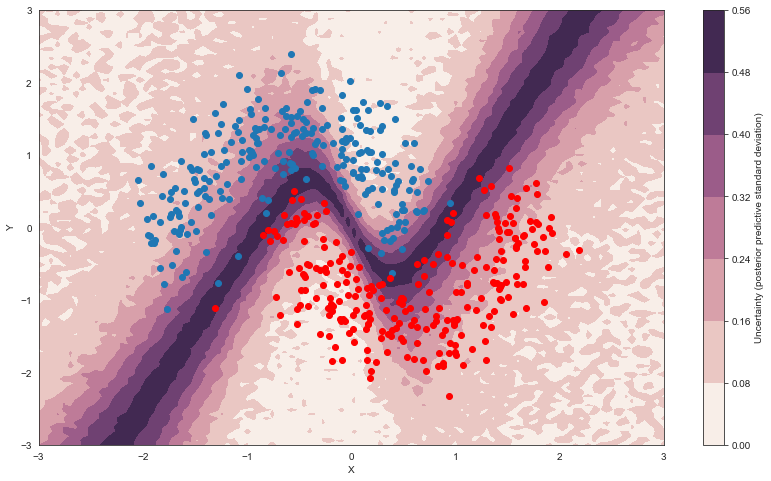

In [16]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, ax = plt.subplots(figsize=(14, 8))
contour = ax.contourf(grid[0], grid[1], ppc['out'].std(axis=0).reshape(100, 100), cmap=cmap)
ax.scatter(X_test[pred==0, 0], X_test[pred==0, 1])
ax.scatter(X_test[pred==1, 0], X_test[pred==1, 1], color='r')
cbar = plt.colorbar(contour, ax=ax)
_ = ax.set(xlim=(-3, 3), ylim=(-3, 3), xlabel='X', ylabel='Y');
cbar.ax.set_ylabel('Uncertainty (posterior predictive standard deviation)');

In [17]:
import numpy as np
np.max( ppc['out'].std(axis=0))

0.5

We can see that very close to the decision boundary, our uncertainty as to which label to predict is highest. You can imagine that associating predictions with uncertainty is a critical property for many applications like health care. To further maximize accuracy, we might want to train the model primarily on samples from that high-uncertainty region.

## Mini-batch ADVI

So far, we have trained our model on all data at once. Obviously this won't scale to something like ImageNet. Moreover, training on mini-batches of data (stochastic gradient descent) avoids local minima and can lead to faster convergence.

Fortunately, ADVI can be run on mini-batches as well. It just requires some setting up:

In [18]:
minibatch_x = pm.Minibatch(X_train, batch_size=32)
minibatch_y = pm.Minibatch(Y_train, batch_size=32)

neural_network_minibatch = construct_nn(minibatch_x, minibatch_y)
with neural_network_minibatch:
    inference = pm.ADVI()
    approx = pm.fit(40000, method=inference)

Finished [100%]: Average Loss = 8.2104


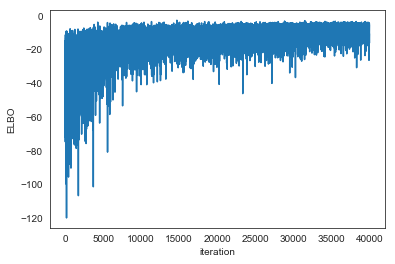

In [19]:
plt.plot(-inference.hist)
plt.ylabel('ELBO')
plt.xlabel('iteration');

As you can see, mini-batch ADVI's running time is much lower. It also seems to converge faster.

For fun, we can also look at the trace. The point is that we also get uncertainty of our Neural Network weights.

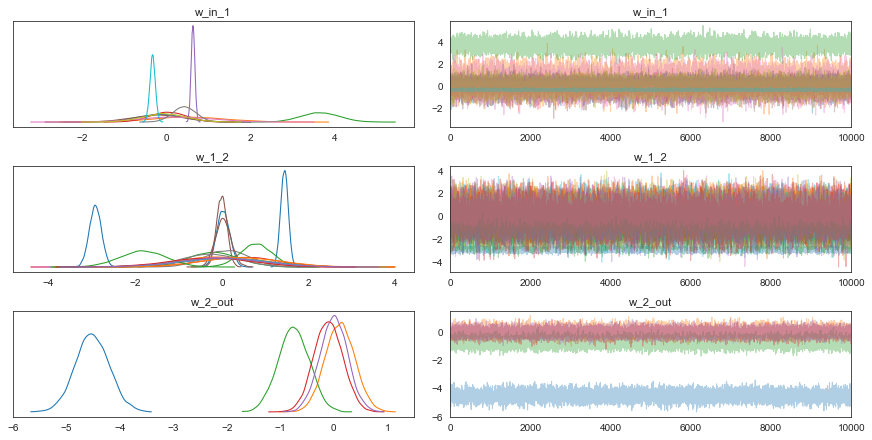

In [20]:
trace_VI = approx.sample(draws=10000)
pm.traceplot(trace_VI);

###  Results with Cauchy priors

In [7]:
def construct_nn(ann_input, ann_output):
    n_hidden = 5 # Number of neurons in each hidden layer
    
    # Initialize random weights between each layer
    init_1 = np.random.randn(X.shape[1], n_hidden).astype(float)
    init_2 = np.random.randn(n_hidden, n_hidden).astype(float)
    init_out = np.random.randn(n_hidden).astype(float)
        
    with pm.Model() as neural_network:
        # Weights from input to hidden layer
        weights_in_1 = pm.Cauchy('w_in_1', alpha = 0, beta =2, 
                                 shape=(X.shape[1], n_hidden), 
                                 testval=init_1)
        
        # Weights from 1st to 2nd layer
        weights_1_2 = pm.Cauchy('w_1_2', alpha = 0, beta =2, 
                                shape=(n_hidden, n_hidden), 
                                testval=init_2)
        
        # Weights from hidden layer to output
        weights_2_out = pm.Cauchy('w_2_out', alpha = 0, beta =2, 
                                  shape=(n_hidden,), 
                                  testval=init_out)
        
        # Build neural-network using tanh activation function
        act_1 = pm.math.tanh(pm.math.dot(ann_input, 
                                         weights_in_1))
        act_2 = pm.math.tanh(pm.math.dot(act_1, 
                                         weights_1_2))
        act_out = pm.math.sigmoid(pm.math.dot(act_2, 
                                              weights_2_out))
        
        # Binary classification -> Bernoulli likelihood
        out = pm.Bernoulli('out', 
                           act_out,
                           observed=ann_output,
                           total_size=Y_train.shape[0] # IMPORTANT for minibatches
                          )
    return neural_network

# Trick: Turn inputs and outputs into shared variables. 
# It's still the same thing, but we can later change the values of the shared variable 
# (to switch in the test-data later) and pymc3 will just use the new data. 
# Kind-of like a pointer we can redirect.
# For more info, see: http://deeplearning.net/software/theano/library/compile/shared.html
ann_input = theano.shared(X_train)
ann_output = theano.shared(Y_train)
neural_network = construct_nn(ann_input, ann_output)

That's not so bad. The `Normal` priors help regularize the weights. Usually we would add a constant `b` to the inputs but I omitted it here to keep the code cleaner.

### Variational Inference: Scaling model complexity

We could now just run a MCMC sampler like NUTS which works pretty well in this case, but as I already mentioned, this will become very slow as we scale our model up to deeper architectures with more layers.

Instead, we will use [ADVI](https://arxiv.org/abs/1603.00788) variational inference algorithm which was recently added to `PyMC3`, and updated to use the operator variational inference (OPVI) framework. This is much faster and will scale better. Note, that this is a mean-field approximation so we ignore correlations in the posterior.

In [8]:
from pymc3.theanof import set_tt_rng, MRG_RandomStreams
set_tt_rng(MRG_RandomStreams(42))

In [9]:
#%%time

with neural_network:
    inference = pm.ADVI()
    approx = pm.fit(n=50000, method=inference)

Finished [100%]: Average Loss = 133.69


Performance wise that's pretty good considering that NUTS is having a really hard time. Further below we make this even faster. To make it really fly, we probably want to run the Neural Network on the GPU.

As samples are more convenient to work with, we can very quickly draw samples from the variational approximation using the `sample` method (this is just sampling from Normal distributions, so not at all the same like MCMC):

In [10]:
trace = approx.sample(draws=5000)

Plotting the objective function (ELBO) we can see that the optimization slowly improves the fit over time.

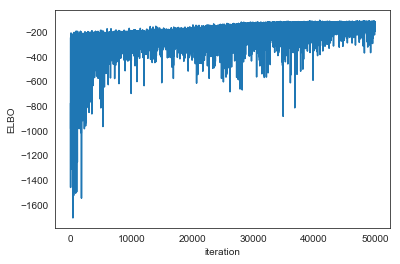

In [11]:
plt.plot(-inference.hist)
plt.ylabel('ELBO')
plt.xlabel('iteration');

Now that we trained our model, lets predict on the hold-out set using a posterior predictive check (PPC). 

In [12]:
# Replace arrays our NN references with the test data
ann_input.set_value(X_test)
ann_output.set_value(Y_test)

with neural_network:
    ppc = pm.sample_posterior_predictive(trace, samples=500, progressbar=False)

# Use probability of > 0.5 to assume prediction of class 1
pred = ppc['out'].mean(axis=0) > 0.5

Let's look at our predictions:

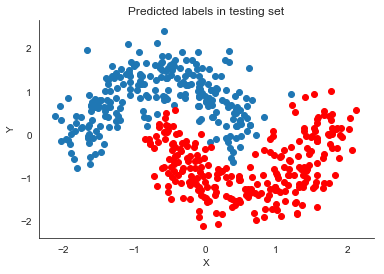

In [13]:
fig, ax = plt.subplots()
ax.scatter(X_test[pred==0, 0], X_test[pred==0, 1])
ax.scatter(X_test[pred==1, 0], X_test[pred==1, 1], color='r')
sns.despine()
ax.set(title='Predicted labels in testing set', xlabel='X', ylabel='Y');

In [14]:
print('Accuracy = {}%'.format((Y_test == pred).mean() * 100))

Accuracy = 95.0%


Hey, our neural network did all right!

## Lets look at what the classifier has learned

For this, we evaluate the class probability predictions on a grid over the whole input space.

In [15]:
grid = pm.floatX(np.mgrid[-3:3:100j,-3:3:100j])
grid_2d = grid.reshape(2, -1).T
dummy_out = np.ones(grid.shape[1], dtype=np.int8)

In [16]:
ann_input.set_value(grid_2d)
ann_output.set_value(dummy_out)

with neural_network:
    ppc = pm.sample_posterior_predictive(trace, samples=500, progressbar=False)

### Probability surface

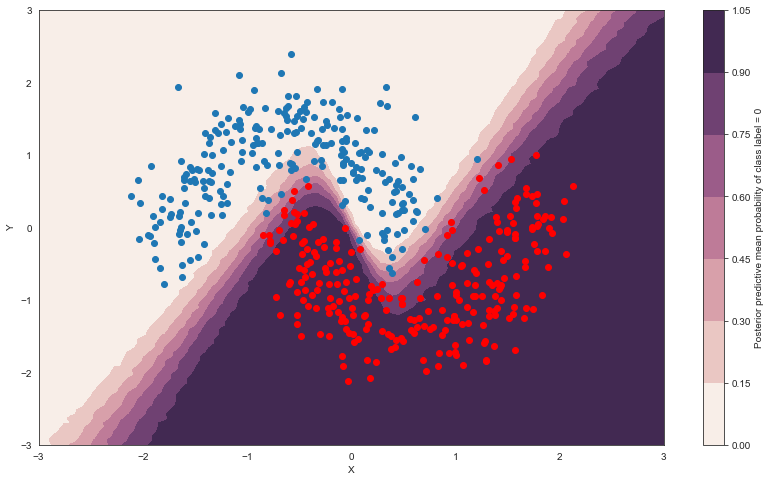

In [17]:
#cmap = sns.diverging_palette(250, 12, s=85, l=25, as_cmap=True)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, ax = plt.subplots(figsize=(14, 8))
contour = ax.contourf(grid[0], grid[1], ppc['out'].mean(axis=0).reshape(100, 100), cmap=cmap)
ax.scatter(X_test[pred==0, 0], X_test[pred==0, 1])
ax.scatter(X_test[pred==1, 0], X_test[pred==1, 1], color='r')
cbar = plt.colorbar(contour, ax=ax)
_ = ax.set(xlim=(-3, 3), ylim=(-3, 3), xlabel='X', ylabel='Y');
cbar.ax.set_ylabel('Posterior predictive mean probability of class label = 0');

### Uncertainty in predicted value

So far, everything I showed we could have done with a non-Bayesian Neural Network. The mean of the posterior predictive for each class-label should be identical to maximum likelihood predicted values. However, we can also look at the standard deviation of the posterior predictive to get a sense for the uncertainty in our predictions. Here is what that looks like:

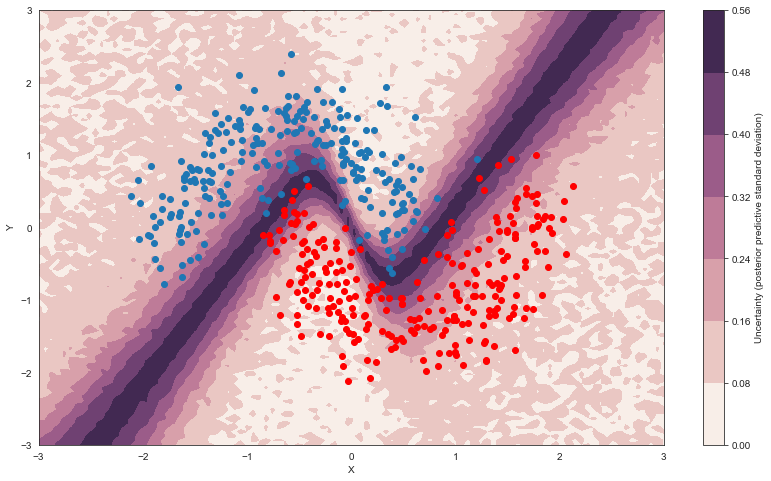

In [18]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, ax = plt.subplots(figsize=(14, 8))
contour = ax.contourf(grid[0], grid[1], ppc['out'].std(axis=0).reshape(100, 100), cmap=cmap)
ax.scatter(X_test[pred==0, 0], X_test[pred==0, 1])
ax.scatter(X_test[pred==1, 0], X_test[pred==1, 1], color='r')
cbar = plt.colorbar(contour, ax=ax)
_ = ax.set(xlim=(-3, 3), ylim=(-3, 3), xlabel='X', ylabel='Y');
cbar.ax.set_ylabel('Uncertainty (posterior predictive standard deviation)');

In [19]:
import numpy as np
np.max( ppc['out'].std(axis=0))

0.5

We can see that very close to the decision boundary, our uncertainty as to which label to predict is highest. You can imagine that associating predictions with uncertainty is a critical property for many applications like health care. To further maximize accuracy, we might want to train the model primarily on samples from that high-uncertainty region.

## Mini-batch ADVI

So far, we have trained our model on all data at once. Obviously this won't scale to something like ImageNet. Moreover, training on mini-batches of data (stochastic gradient descent) avoids local minima and can lead to faster convergence.

Fortunately, ADVI can be run on mini-batches as well. It just requires some setting up:

In [20]:
minibatch_x = pm.Minibatch(X_train, batch_size=32)
minibatch_y = pm.Minibatch(Y_train, batch_size=32)

neural_network_minibatch = construct_nn(minibatch_x, minibatch_y)
with neural_network_minibatch:
    inference = pm.ADVI()
    approx = pm.fit(40000, method=inference)

Finished [100%]: Average Loss = 11.726


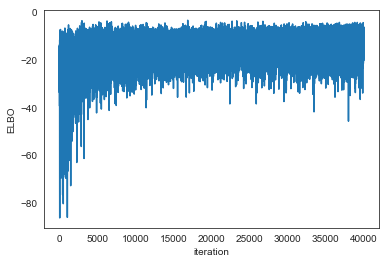

In [21]:
plt.plot(-inference.hist)
plt.ylabel('ELBO')
plt.xlabel('iteration');

As you can see, mini-batch ADVI's running time is much lower. It also seems to converge faster.

For fun, we can also look at the trace. The point is that we also get uncertainty of our Neural Network weights.

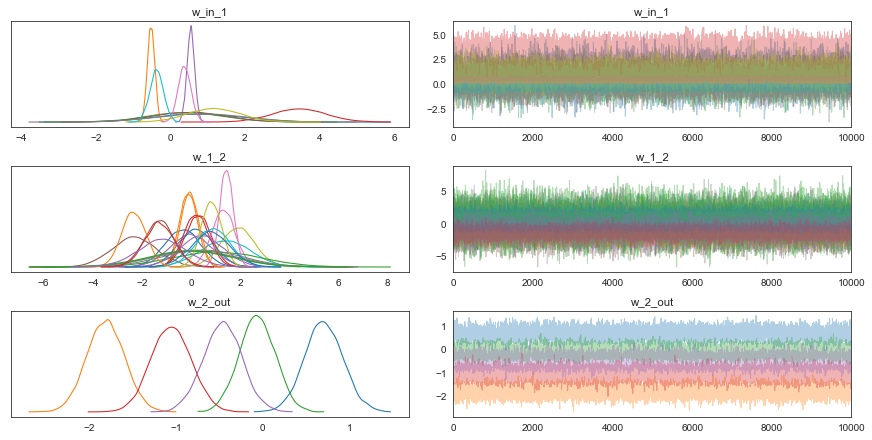

In [22]:
trace_VI = approx.sample(draws=10000)
pm.traceplot(trace_VI);

Answer: The peformance of the model in terms of accuracy and identifying regions of uncertainty is essetially unchanged. The weights within the neural at first look different. Closer examination shows that with both priors, there are almost the same number of weights that are not significantly different from zero. Not suprisingly, the Cauchy has spred the weight distributions out more, i.e., the have higher variance and cover a broader range of values, than the Gaussians. This may be better for regularization. Hence, the use of the results from the Cauchy priors would be preferred on new data based on this initial assessment but further testing would be needed before making this conclusive.

## Problem 4

You are tracking the performance of a set of companies with the idea that you might possibly buy stock in them. You decide to automate this process using HMM and you implement your first version for one company. This company has three states that are hidden from investors: (1) in-trouble; (2) static; and (3) major growth potential. You have estimated  the transition probabilities between states  as follows:


$\begin{bmatrix}
.6 & .3 & .1 \\
.4 & .4 & .2 \\
.1 & .4 & .5 
\end{bmatrix}$

You have a text analysis system using Naive Bayes to process the quarterly reports and assess their sentiment into one of three categories: (1) Fine; (2) Good; and (3) Very good. Your estimates for the probabilities of these sentiments given the state of the company are shown in the following matrix (the sentiments are in the rows and the states of the company are in the columns).


$\begin{bmatrix}
.45 & .4 & .15 \\
.3 & .4 & .3 \\
.2 & .5 & .3 
\end{bmatrix}$

You have 3 quarterly reports with the assessments: Fine, Fine, Very Good and your prior for the initial state is equally likely for each value. The following questions use the HMM class in the  jupyter notebook, \texttt{HMM Examples HW5 -  Burglary and Investment} with your additions to it as indicated in the notebook. 

  In order to decide whether to invest, find the most likely current state given the observed states.


In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Nov 12 20:35:27 2020

@author: donaldbrown
"""

import numpy as np
import pandas as pd

class HMM:
    """Creates a class for Hidden Markov Models
    Input:
        Viz:      List of observed or visible states over time
        Trans_M:  Transition matrix for hidden states, H X H, H=len(Trans_M), no. of hidden variables
        Obs_M:    Observation matrix, H X V, V = no. of visible variables
        Pi:       List of initial state probabilities
    Methods:
        filter = The posterior probabilities for hidden states for each time period, T X H array
        smoother = The probabiliteis for the hidden states at each prevoius time period, T X H array
        viturbi = The most likely path of hidden states given the observed state, data frame, 1 X T
        predictor = The probabilities for next hidden state and the next observed state, 1 X H array"""
    
    def __init__(self,Viz, Trans_M, Obs_M, Pi):
        # initialize variables
        # Hidden state transition matrix
        self.Trans_M = Trans_M
        # Visible or observates state probabilities given the hidden states
        self.Obs_M = Obs_M
        # No. of hidden states
        self.H = Trans_M.shape[0]
        # No. of observed states
        self.V = Obs_M.shape[0]
        # prior probabaiities for the hidden states
        self.Pi = Pi
        # List of observed states over time
        self.Viz = Viz

        
    def filter(self):
        
        T = len(self.Viz)
        
        # Obtain the joint probabilities of the hidden and observed states at time t
        self.alpha = np.zeros((T, self.H))
        self.alpha[0, :] = self.Pi * self.Obs_M[:,self.Viz[0]]
 
        for t in range(1, T):
            for j in range(self.H):
                self.alpha[t, j] = self.alpha[t - 1].dot(self.Trans_M[:, j]) * self.Obs_M[j, self.Viz[t]]
        
        # Obtain the poserior probabilities of the hidden states given the observed states
        self.Post = self.alpha / np.sum(self.alpha, axis=1).reshape((-1, 1))
    
        print("self.alpha")
        print(self.alpha)
        print("Posterior")
        print(self.Post)   
        return self.Post
      
    def smoother(self):

        T = len(self.Viz)
        beta = np.zeros((T, self.H))
 
        # setting beta(T) = 1
        beta[T - 1] = np.ones((self.H))
 
        # Loop backwards way from T-1 to 1
        # Due to python indexing the actual loop will be T-2 to 0
        for t in range(T- 2, -1, -1):
            for j in range(self.H):
                beta[t, j] = (beta[t + 1] * self.Obs_M[:, self.Viz[t + 1]]).dot(self.Trans_M[j, :])
                
        # Obtain the posterior probabilities of the hidden states given the observed states       
        Post = beta*self.alpha
        Post = Post / np.sum(Post, axis=1).reshape((-1, 1))
    
        print("beta")
        print(beta)
        print("Posterior")
        print(Post)
 
        return Post
    
    
    def viturbi(self):
        T = len(self.Viz)
        
        # Obtain the joint probabity of the most likely path that ends in state j at time t
        delta = np.zeros((T, self.H))
        delta[0, :] = (self.Pi * self.Obs_M[:, Viz[0]])
 

        prev = np.zeros((T, self.H))
        prev[0,:] = np.repeat(None, 3)
 
        for t in range(1, T):
            for j in range(self.H):
                # The most likely state given our previoius state at t-1
                
                prob = delta[t - 1]* (self.Trans_M[:, j])
 
                #  The probability of the most probable state given the previous state and the observation at time t
                
                delta[t, j] = np.max(prob) * (self.Obs_M[j, Viz[t]])                
                
                # The most probable state given previous state 

                prev[t, j] = np.argmax(prob)
 
                
        # Path Array
        S = np.zeros(T)
 
        # Find the most probable last hidden state
        last_state = np.argmax(delta[T-1, :])
 
        S[T-1] = last_state
        
        for t in range(T - 1, -1, -1):
            S[t] = np.argmax(delta[t, :])
            
        # Change to states numbers in problem (i.e., +1)
        S = S+1
            
        S = S.reshape([1,3])
 
        # Path as a dataframe 
        # Create a list of column names, Time with 
        cols = list()
        for i in range(1,T+1):
            cols.append("Time "+(str(i)))
        Path = pd.DataFrame(S, columns = cols)
        print('delta')
        print(delta)
        print('Previous')
        print(prev)        
        print("Path")
        print(Path)
        return Path
 

    def predictor(self, steps = 1):
        T = len(self.Viz)
        # Hidden state prediction using filtering results
        Pred_Hidden = self.Post[T-1,:].dot(self.Trans_M)
        print("Predicted Hidden State")
        print(Pred_Hidden)
        # Visible state prediction
        Pred_Visible = Pred_Hidden.dot(self.Obs_M)
        print("Predicted Visible State")
        print(Pred_Visible)
    
        

 
 


In [7]:
# Problem from HW 5 - decide whether to invest in a a company

# Data 
# Transition matrix
TM = np.array([[.6,.3,.1],[.4,.4,.2],[.1,.4,.5]])  
# Observation matrix
OM = np.array([[.45,.4,.15],[.3,.4,.3],[.2,.5,.3]])
OM = OM.T
# Prior probabilities of hidden states
p = [.33,.33,0.33]
# Observed visible states
Viz = [0,0,2]

In [8]:
# Filtering results

hmm2 = HMM(Viz, TM, OM, p)
hmm2.filter()

self.alpha
[[0.1485     0.132      0.0495    ]
 [0.0660825  0.04686    0.0099    ]
 [0.0118767  0.02126438 0.00627908]]
Posterior
[[0.45       0.4        0.15      ]
 [0.53794493 0.38146407 0.080591  ]
 [0.301285   0.53942907 0.15928592]]


array([[0.45      , 0.4       , 0.15      ],
       [0.53794493, 0.38146407, 0.080591  ],
       [0.301285  , 0.53942907, 0.15928592]])

So the most likely current state is static with a probability of $0.54$

Using smoothing to find the most likely state at each previous time period (i.e., periods 1 and 2)

In [9]:
# Smoothing results

hmm2.smoother()

beta
[[0.12735 0.1195  0.09565]
 [0.3     0.34    0.37   ]
 [1.      1.      1.     ]]
Posterior
[[0.47974133 0.40015068 0.12010799]
 [0.50290905 0.40416893 0.09292202]
 [0.301285   0.53942907 0.15928592]]


array([[0.47974133, 0.40015068, 0.12010799],
       [0.50290905, 0.40416893, 0.09292202],
       [0.301285  , 0.53942907, 0.15928592]])

From this the most likely state at time 1 is in-trouble with $p = 0.48$, at time 2 it is in-trouble with $p=0.50$ and as noted above, at time 3 it is static with $p = 0.54$.

Show the most likely path of performance through the hidden states up to the current time.

In [10]:
# Decoder results

hmm2.viturbi()

delta
[[0.1485     0.132      0.0495    ]
 [0.040095   0.02112    0.00396   ]
 [0.0048114  0.00601425 0.0012672 ]]
Previous
[[nan nan nan]
 [ 0.  1.  1.]
 [ 0.  0.  1.]]
Path
   Time 1  Time 2  Time 3
0     1.0     1.0     2.0


,Time 1,Time 2,Time 3
0,1.0,1.0,2.0


For this company the most likely path is the same as the smoothing path: in-trouble, in-trouble, and static.

Find the most likely hidden state and visible state for this company in the next time period.

In [11]:
# Prediction results

hmm2.predictor()

Predicted Hidden State
[0.41247122 0.3698715  0.21765728]
Predicted Visible State
[0.36620924 0.33698715 0.33272718]


The most likely hidden state is in-trouble and the most likely visible state is fine, although both good and very good are almost as likely (i.e., all 3 visible states are almost equally likely).